In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

### Load Data

In [20]:
root_folder = "./COP analysis"
subjects = ['mci002', 'mci004', 'mci005', 'mci006', 'mci007']  # List of subjects
# subjects = ['mci004', 'mci006', 'mci007']  # List of subjects

dataFrames = {}
root = f"{root_folder}/data/compiled_data"
root_files = os.listdir(root)

# files = [file for file in root_files if any(subject in file for subject in subjects) and 'right' not in file]
files = ['mci002_left_df.csv', 'mci003_right_df.csv', 'mci004_left_df.csv', 'mci005_left_df.csv', 'mci006_right_df.csv', 'mci007_left_df.csv', 'mci008_left_df.csv', 'mci009_left_df.csv', 'mci010_right_df.csv']

print(files)
num_rows = len(files) # Add 1 to ensure we have enough rows for an odd number of files

avg_time_columns = ['Date', 'Avg_Step_Time', 'Avg_Swing_Time', 'Avg_Stride_Time']
variability_columns = ['Date', 'Step_Time_Variability', 'Stride_Time_Variability']
speed_columns = ['Date', 'Median_COP_Speed', 'Avg_COP_Speed']
activity_columns = ['Date', 'Total_Activity_Time_minutes']
cadence_columns = ['Date', 'Avg_Cadence']

['mci002_left_df.csv', 'mci003_right_df.csv', 'mci004_left_df.csv', 'mci005_left_df.csv', 'mci006_right_df.csv', 'mci007_left_df.csv', 'mci008_left_df.csv', 'mci009_left_df.csv', 'mci010_right_df.csv']


### Population Mean and Standard Deviation

In [21]:
# Initialize empty lists to store data for all subjects
all_subject_timings = []
all_subject_variability = []
all_subject_speed = []
all_subject_activity = []
all_subject_cadence = []
activity_per_subject = []


for file in files:
    file_path = os.path.join(root_folder, 'data', 'compiled_data', file)

    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    
    df_activity = df[activity_columns]
    df_avg_time = df[avg_time_columns]
    df_variability = df[variability_columns]
    df_speed = df[speed_columns]
    df_cadence = df[cadence_columns]
    
    # Calculate the daily average for the selected columns
    daily_activity = df_activity.groupby('Date').sum()
    daily_avg_time = df_avg_time.groupby('Date').mean()
    daily_variability = df_variability.groupby('Date').mean()
    daily_speed = df_speed.groupby('Date').mean()
    daily_cadence = df_cadence.groupby('Date').mean()
    
    # Append the daily average data to the list for all subjects
    all_subject_timings.append(daily_avg_time)
    all_subject_variability.append(daily_variability)
    all_subject_speed.append(daily_speed)
    all_subject_activity.append(daily_activity)
    all_subject_cadence.append(daily_cadence)
    activity_per_subject.append(daily_activity)
    

# Concatenate the data for all subjects into one DataFrame
combined_timings = pd.concat(all_subject_timings)
combined_variability = pd.concat(all_subject_variability)
combined_speed = pd.concat(all_subject_speed)
combined_activity = pd.concat(all_subject_activity)
combined_cadence = pd.concat(all_subject_cadence)

In [16]:
sample = {
    'timings': {},
    'variability': {},
    'speed': {},
    'activity': {},
    'cadence': {}
}

# Calculate the mean and standard deviation for all subjects as a whole
sample['timings']['mean'] = combined_timings.mean()
sample['timings']['median'] = combined_timings.median()
sample['timings']['std'] = combined_timings.std()
sample['timings']['min'] = combined_timings.min()
sample['timings']['max'] = combined_timings.max()
sample['variability']['mean'] = combined_variability.mean()
sample['variability']['median'] = combined_variability.median()
sample['variability']['std'] = combined_variability.std()
sample['variability']['min'] = combined_variability.min()
sample['variability']['max'] = combined_variability.std()
sample['speed']['mean'] = combined_speed.mean()
sample['speed']['median'] = combined_speed.median()
sample['speed']['std'] = combined_speed.std()
sample['speed']['min'] = combined_speed.min()
sample['speed']['max'] = combined_speed.max()
sample['activity']['mean'] = combined_activity.mean()
sample['activity']['median'] = combined_activity.median()
sample['activity']['std'] = combined_activity.std()
sample['activity']['min'] = combined_activity.min()
sample['activity']['max'] = combined_activity.max()
sample['cadence']['mean'] = combined_cadence.mean()
sample['cadence']['median'] = combined_cadence.median()
sample['cadence']['std'] = combined_cadence.std()
sample['cadence']['min'] = combined_cadence.min()
sample['cadence']['max'] = combined_cadence.max()

sample


{'timings': {'mean': Avg_Step_Time      0.848738
  Avg_Swing_Time     0.775607
  Avg_Stride_Time    1.507300
  dtype: float64,
  'median': Avg_Step_Time      0.816330
  Avg_Swing_Time     0.724642
  Avg_Stride_Time    1.429056
  dtype: float64,
  'std': Avg_Step_Time      0.197323
  Avg_Swing_Time     0.225006
  Avg_Stride_Time    0.373375
  dtype: float64,
  'min': Avg_Step_Time      0.524009
  Avg_Swing_Time     0.494126
  Avg_Stride_Time    1.082892
  dtype: float64,
  'max': Avg_Step_Time      2.247027
  Avg_Swing_Time     2.326907
  Avg_Stride_Time    4.446813
  dtype: float64},
 'variability': {'mean': Step_Time_Variability      0.758294
  Stride_Time_Variability    0.735925
  dtype: float64,
  'median': Step_Time_Variability      0.632902
  Stride_Time_Variability    0.581723
  dtype: float64,
  'std': Step_Time_Variability      0.551239
  Stride_Time_Variability    0.739967
  dtype: float64,
  'min': Step_Time_Variability      0.277027
  Stride_Time_Variability    0.235865
  dt

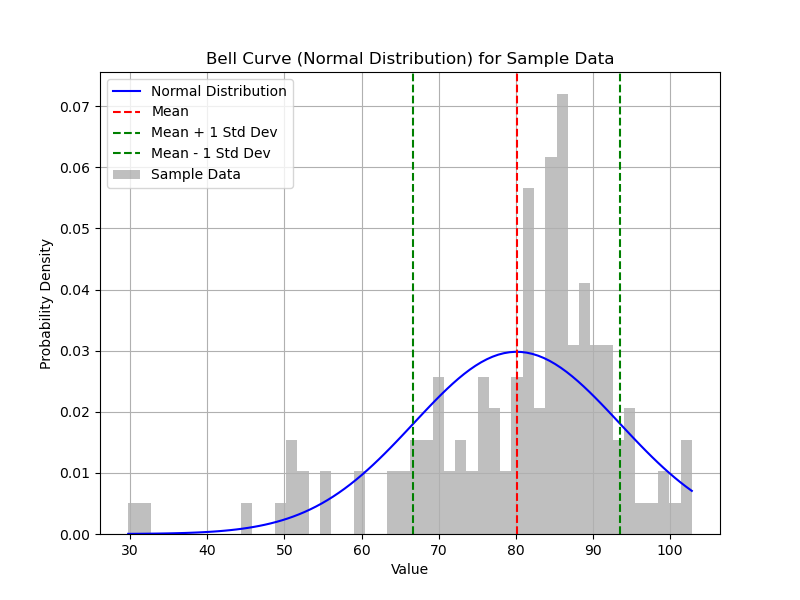

In [68]:
# Calculate mean and standard deviation
from scipy.stats import norm

data = combined_cadence['Avg_Cadence']
mean = np.mean(data)
std_dev = np.std(data)

# Generate data points for the bell curve
x = np.linspace(min(data), max(data), 100)
y = norm.pdf(x, mean, std_dev)

# Plot the bell curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Normal Distribution')

# Plot mean and standard deviation lines
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(mean + std_dev, color='green', linestyle='--', label='Mean + 1 Std Dev')
plt.axvline(mean - std_dev, color='green', linestyle='--', label='Mean - 1 Std Dev')

# Plot the sample data as a histogram
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Sample Data')

# Add legend and labels
plt.legend()
plt.title('Bell Curve (Normal Distribution) for Sample Data')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.grid(True)
plt.show()

In [70]:
file = 'mci001_left_df.csv'
file_path = os.path.join(root_folder, 'data', 'compiled_data', file)
df = pd.read_csv(file_path)

df['Avg_Cadence']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9       6.261510
10     21.733506
11     22.673021
12     62.953139
13           NaN
14           NaN
15           NaN
16           NaN
17     73.409998
18     84.201294
19     95.976006
20     89.860140
21           NaN
22     73.738113
23     78.549201
24     92.370615
25    101.355014
26           NaN
27           NaN
28           NaN
29           NaN
30           NaN
31           NaN
32           NaN
33     80.907029
34           NaN
35           NaN
36    100.405702
37     77.147287
38     78.584975
39     77.212411
40     76.798074
Name: Avg_Cadence, dtype: float64

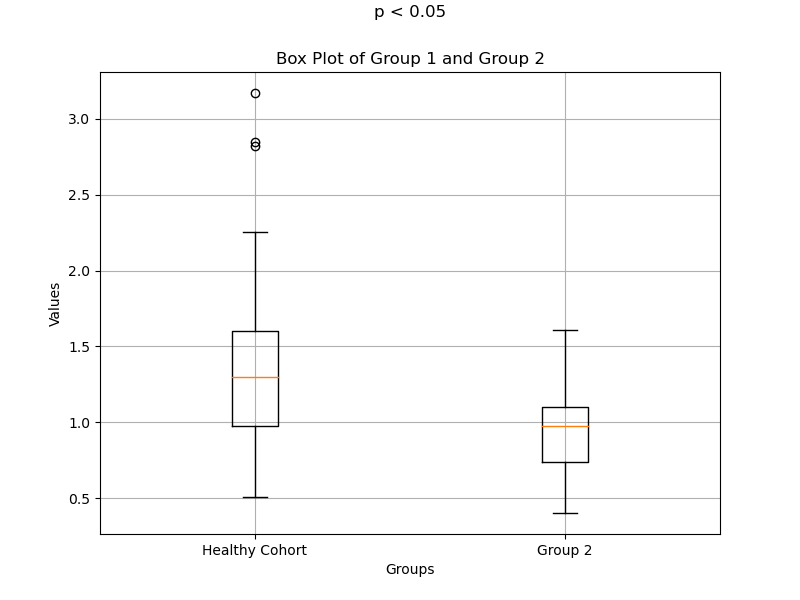

(3.3628117782456157, 0.0009807162476285596)

In [114]:
from scipy.stats import ttest_ind

file = 'mci001_left_df.csv'
file_path = os.path.join(root_folder, 'data', 'compiled_data', file)
df = pd.read_csv(file_path)


# Sample data for two groups
data1 = combined_speed['Median_COP_Speed'].dropna() # Sample data for group 1
data2 = df['Median_COP_Speed'].dropna()  # Sample data for group 2

# Perform t-test
t_statistic, p_value = ttest_ind(data1, data2)

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot([data1, data2], labels=['Healthy Cohort', 'Group 2'])

# Add significance indicator if p-value is less than 0.05
if p_value < 0.05:
    plt.text(1.5, max(max(data1), max(data2)) + 0.5, "p < 0.05", horizontalalignment='center', fontsize=12)

# Add title and labels
plt.title('Box Plot of Group 1 and Group 2')
plt.xlabel('Groups')
plt.ylabel('Values')

plt.grid(True)
plt.show()

t_statistic, p_value

In [121]:
data1.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)

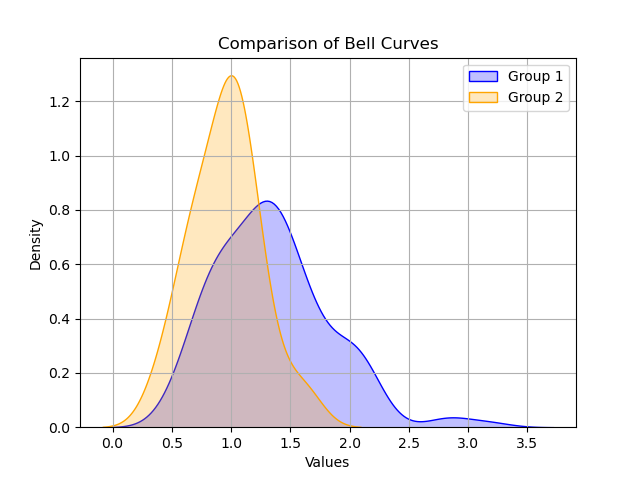

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for two groups

# Create KDE plots
plt.figure()
sns.kdeplot(data1, label='Group 1', color='blue', shade=True)
sns.kdeplot(data2, label='Group 2', color='orange', shade=True)

# Add legend, title, and labels
plt.legend()
plt.title('Comparison of Bell Curves')
plt.xlabel('Values')
plt.ylabel('Density')

plt.grid(True)
plt.show()

In [38]:
from scipy.stats import t
def calculate_bounds(data):
    # Calculate sample standard deviation
    sample_std = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
    sample_mean = np.mean(data)
    # Calculate the critical value (t-value) for the desired confidence level and degrees of freedom
    confidence_level = 0.95  # For a 95% confidence level
    degrees_of_freedom = len(data) - 1
    t_value = t.ppf((1 + confidence_level) / 2, df=degrees_of_freedom)

    # Calculate the standard error of the mean
    standard_error = sample_std / np.sqrt(len(data))

    # Calculate the margin of error
    margin_of_error = t_value * standard_error

    # Calculate the upper and lower bounds of the standard deviation
    lower_bound = sample_std - margin_of_error
    upper_bound = sample_std + margin_of_error

    print("Sample Standard Deviation:", sample_std)
    print("Lower Bound of Standard Deviation:", lower_bound)
    print("Upper Bound of Standard Deviation:", upper_bound)
    print('Median:', sample_mean)
    print('Upper Border', sample_mean + sample_std)
    print('Lower Border', sample_mean - sample_std)
    
print('Variability')    
calculate_bounds(combined_variability['Stride_Time_Variability'])
print('Gait Time')
calculate_bounds(combined_timings['Avg_Stride_Time'])
print('Cadence')
calculate_bounds(combined_cadence['Avg_Cadence'])
print('COP Speed')
calculate_bounds(combined_speed['Median_COP_Speed'])

Variability
Sample Standard Deviation: 0.730928905202183
Lower Bound of Standard Deviation: 0.6251943064171825
Upper Bound of Standard Deviation: 0.8366635039871835
Median: 0.739932735575537
Upper Border 1.47086164077772
Lower Border 0.00900383037335395
Gait Time
Sample Standard Deviation: 0.41976733183909265
Lower Bound of Standard Deviation: 0.35904469506940634
Upper Bound of Standard Deviation: 0.48048996860877896
Median: 1.5414303504814775
Upper Border 1.9611976823205701
Lower Border 1.1216630186423848
Cadence
Sample Standard Deviation: 13.430862814028847
Lower Bound of Standard Deviation: 11.487983170235166
Upper Bound of Standard Deviation: 15.373742457822528
Median: 80.11282666377525
Upper Border 93.5436894778041
Lower Border 66.68196384974641
COP Speed
Sample Standard Deviation: 0.4859444797186636
Lower Bound of Standard Deviation: 0.4156487994833525
Upper Bound of Standard Deviation: 0.5562401599539748
Median: 1.3450285871837326
Upper Border 1.8309730669023963
Lower Border 0.8

In [23]:
mean_variability = sample['variability']['mean']['Stride_Time_Variability']
std_variability = sample['variability']['std']['Stride_Time_Variability']
upper_bound = mean_variability + std_variability
lower_bound = mean_variability - std_variability
print(upper_bound, lower_bound)
print(std_variability)
print(mean_variability)
print("Coeficient of Variation", std_variability / mean_variability)

1.4758912688221348 -0.00404212950924232
0.7399666991656886
0.7359245696564463
Coeficient of Variation 1.0054925867078053


In [6]:
# Calculate the mean and standard deviation for all subjects as a whole
for df in all_subject_timings:
    df['Combined_Time'] = df['Avg_Step_Time'] + df['Avg_Swing_Time']

    # Calculate the percentage
    df['Step_Time_Percentage'] = (df['Avg_Step_Time'] / df['Combined_Time']) * 100
    df['Swing_Time_Percentage'] = (df['Avg_Swing_Time'] / df['Combined_Time']) * 100

    print(df['Step_Time_Percentage'].mean(),
          df['Swing_Time_Percentage'].mean())

54.8431416108198 45.156858389180215
50.06162822357486 49.93837177642515
49.332216967113176 50.66778303288683
53.91547871271872 46.08452128728128
51.58736499824091 48.412635001759085
54.744700058563446 45.25529994143656
50.95815528160342 49.041844718396575
49.04785504655117 50.95214495344883


In [7]:
for subject in activity_per_subject:
    print(subject.mean())

Total_Activity_Time_minutes    26.180056
dtype: float64
Total_Activity_Time_minutes    13.539833
dtype: float64
Total_Activity_Time_minutes    4.093611
dtype: float64
Total_Activity_Time_minutes    35.865909
dtype: float64
Total_Activity_Time_minutes    35.681096
dtype: float64
Total_Activity_Time_minutes    36.598272
dtype: float64
Total_Activity_Time_minutes    17.065238
dtype: float64
Total_Activity_Time_minutes    33.220298
dtype: float64


In [8]:
for subject in all_subject_timings:
    print(subject.mean())

Avg_Step_Time             0.755044
Avg_Swing_Time            0.631250
Avg_Stride_Time           1.348607
Combined_Time             1.386294
Step_Time_Percentage     54.843142
Swing_Time_Percentage    45.156858
dtype: float64
Avg_Step_Time             0.747863
Avg_Swing_Time            0.772950
Avg_Stride_Time           1.465614
Combined_Time             1.520813
Step_Time_Percentage     50.061628
Swing_Time_Percentage    49.938372
dtype: float64
Avg_Step_Time             0.897203
Avg_Swing_Time            0.925727
Avg_Stride_Time           1.671673
Combined_Time             1.822930
Step_Time_Percentage     49.332217
Swing_Time_Percentage    50.667783
dtype: float64
Avg_Step_Time             0.659427
Avg_Swing_Time            0.563234
Avg_Stride_Time           1.191417
Combined_Time             1.222662
Step_Time_Percentage     53.915479
Swing_Time_Percentage    46.084521
dtype: float64
Avg_Step_Time             0.853573
Avg_Swing_Time            0.826769
Avg_Stride_Time           1.62

In [12]:
for subject in all_subject_variability:
    print(subject.mean())
    
combined_variability.mean()

Step_Time_Variability      0.519650
Stride_Time_Variability    0.715118
dtype: float64
Step_Time_Variability      0.629262
Stride_Time_Variability    1.016162
dtype: float64
Step_Time_Variability      1.198079
Stride_Time_Variability    1.880193
dtype: float64
Step_Time_Variability      0.513251
Stride_Time_Variability    0.795237
dtype: float64
Step_Time_Variability      1.017834
Stride_Time_Variability    1.405238
dtype: float64
Step_Time_Variability      0.621584
Stride_Time_Variability    0.783165
dtype: float64
Step_Time_Variability      0.543634
Stride_Time_Variability    0.768983
dtype: float64
Step_Time_Variability      0.838104
Stride_Time_Variability    1.344561
dtype: float64


Step_Time_Variability      0.686057
Stride_Time_Variability    1.001287
dtype: float64

In [10]:
for subject in all_subject_speed:
    print(subject.median())
    
combined_speed.median()

Median_COP_Speed    0.993233
Avg_COP_Speed       0.584540
dtype: float64
Median_COP_Speed    0.916346
Avg_COP_Speed       0.484926
dtype: float64
Median_COP_Speed    1.346326
Avg_COP_Speed       0.934444
dtype: float64
Median_COP_Speed    1.445765
Avg_COP_Speed       0.801746
dtype: float64
Median_COP_Speed    1.016045
Avg_COP_Speed       0.791230
dtype: float64
Median_COP_Speed    1.591981
Avg_COP_Speed       0.762501
dtype: float64
Median_COP_Speed    1.708044
Avg_COP_Speed       0.922805
dtype: float64
Median_COP_Speed    1.499408
Avg_COP_Speed       0.887993
dtype: float64


Median_COP_Speed    1.424248
Avg_COP_Speed       0.802626
dtype: float64

In [11]:
for subject in all_subject_cadence:
    print(subject.mean())
    
combined_speed.mean()

Avg_Cadence    89.578581
dtype: float64
Avg_Cadence    86.122722
dtype: float64
Avg_Cadence    66.69706
dtype: float64
Avg_Cadence    102.508758
dtype: float64
Avg_Cadence    80.205834
dtype: float64
Avg_Cadence    87.233461
dtype: float64
Avg_Cadence    85.233438
dtype: float64
Avg_Cadence    80.24325
dtype: float64


Median_COP_Speed    1.420834
Avg_COP_Speed       0.798771
dtype: float64

## Activity

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


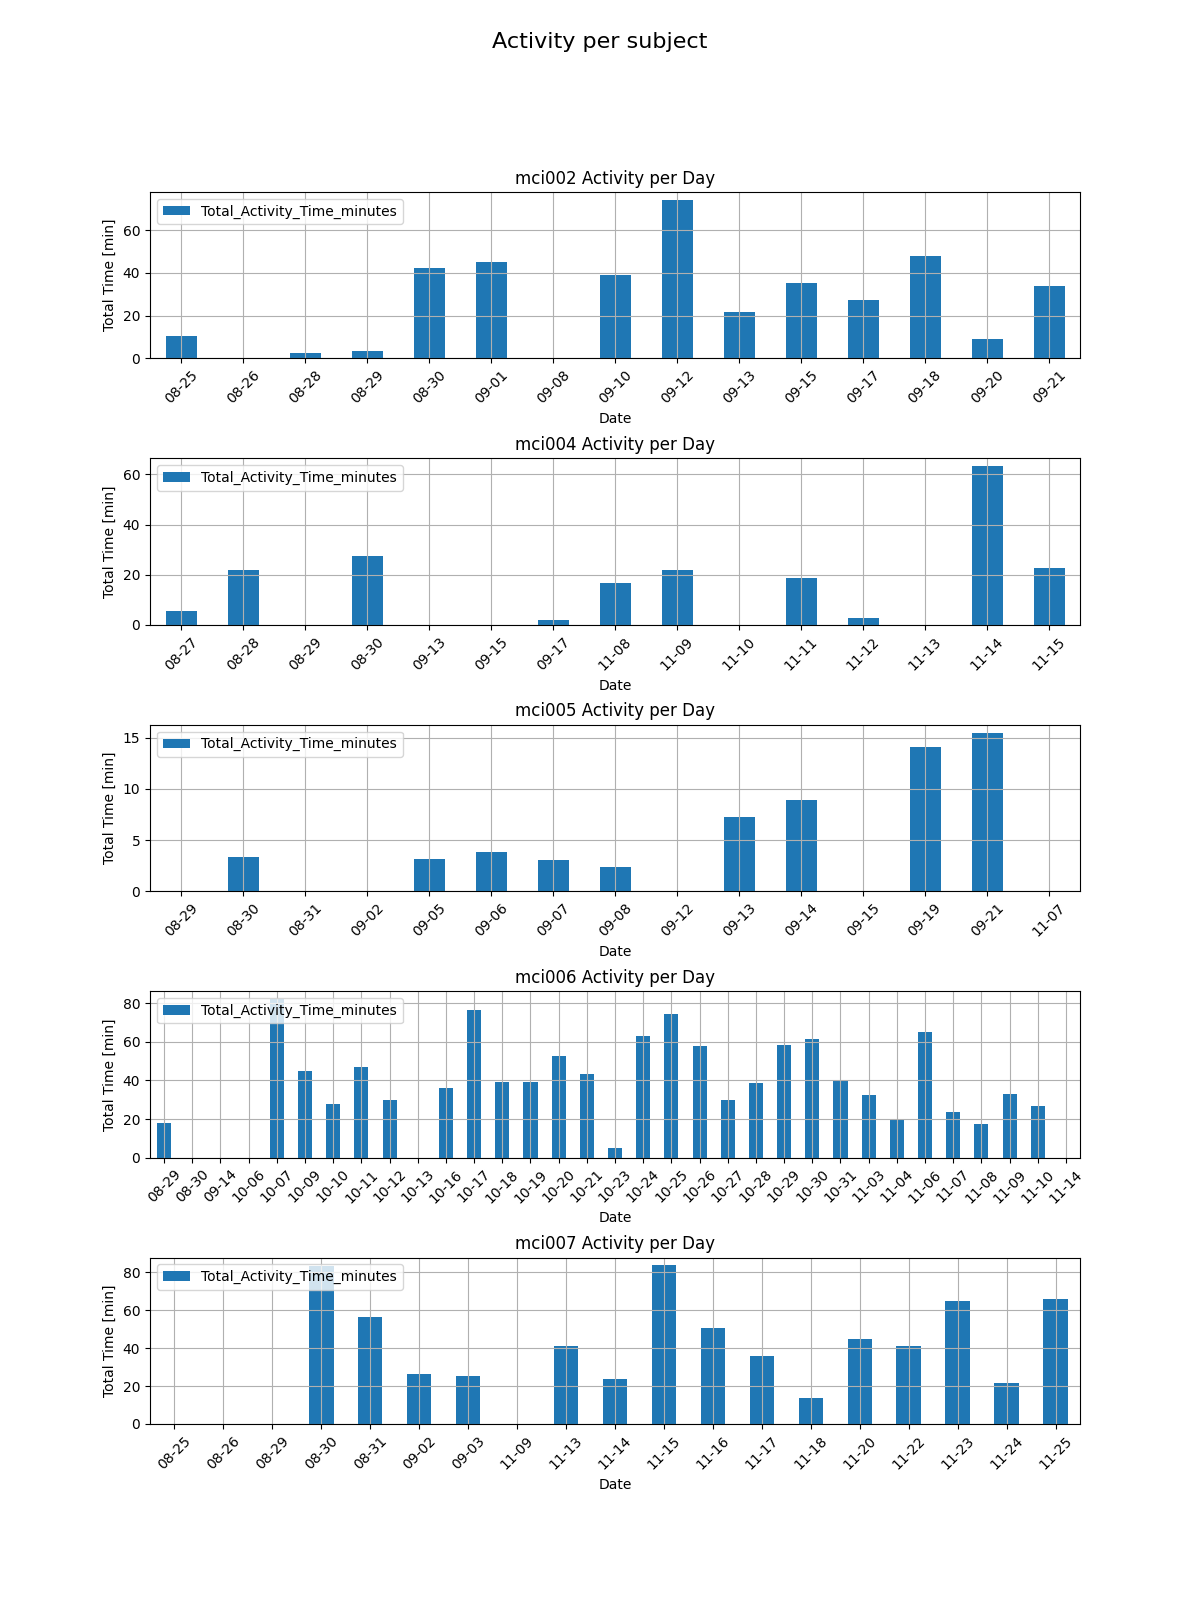

In [21]:
index = 0

fig, axes = plt.subplots(nrows=len(subjects), ncols=1, figsize=(12, 16))
print(axes)
fig.suptitle(f'Activity per subject', fontsize=16)
plt.subplots_adjust(hspace=0.6)

for file in files:
    # if 'left' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    # Calculate the average per day for the selected columns
    df_activity = df_left[activity_columns]
    daily_activity = df_activity.groupby('Date').sum()

    ax = daily_activity.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Activity per Day')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Time [min]')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_activity.index])
    
    index += 1
    

plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Activity.png')

### Timings

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


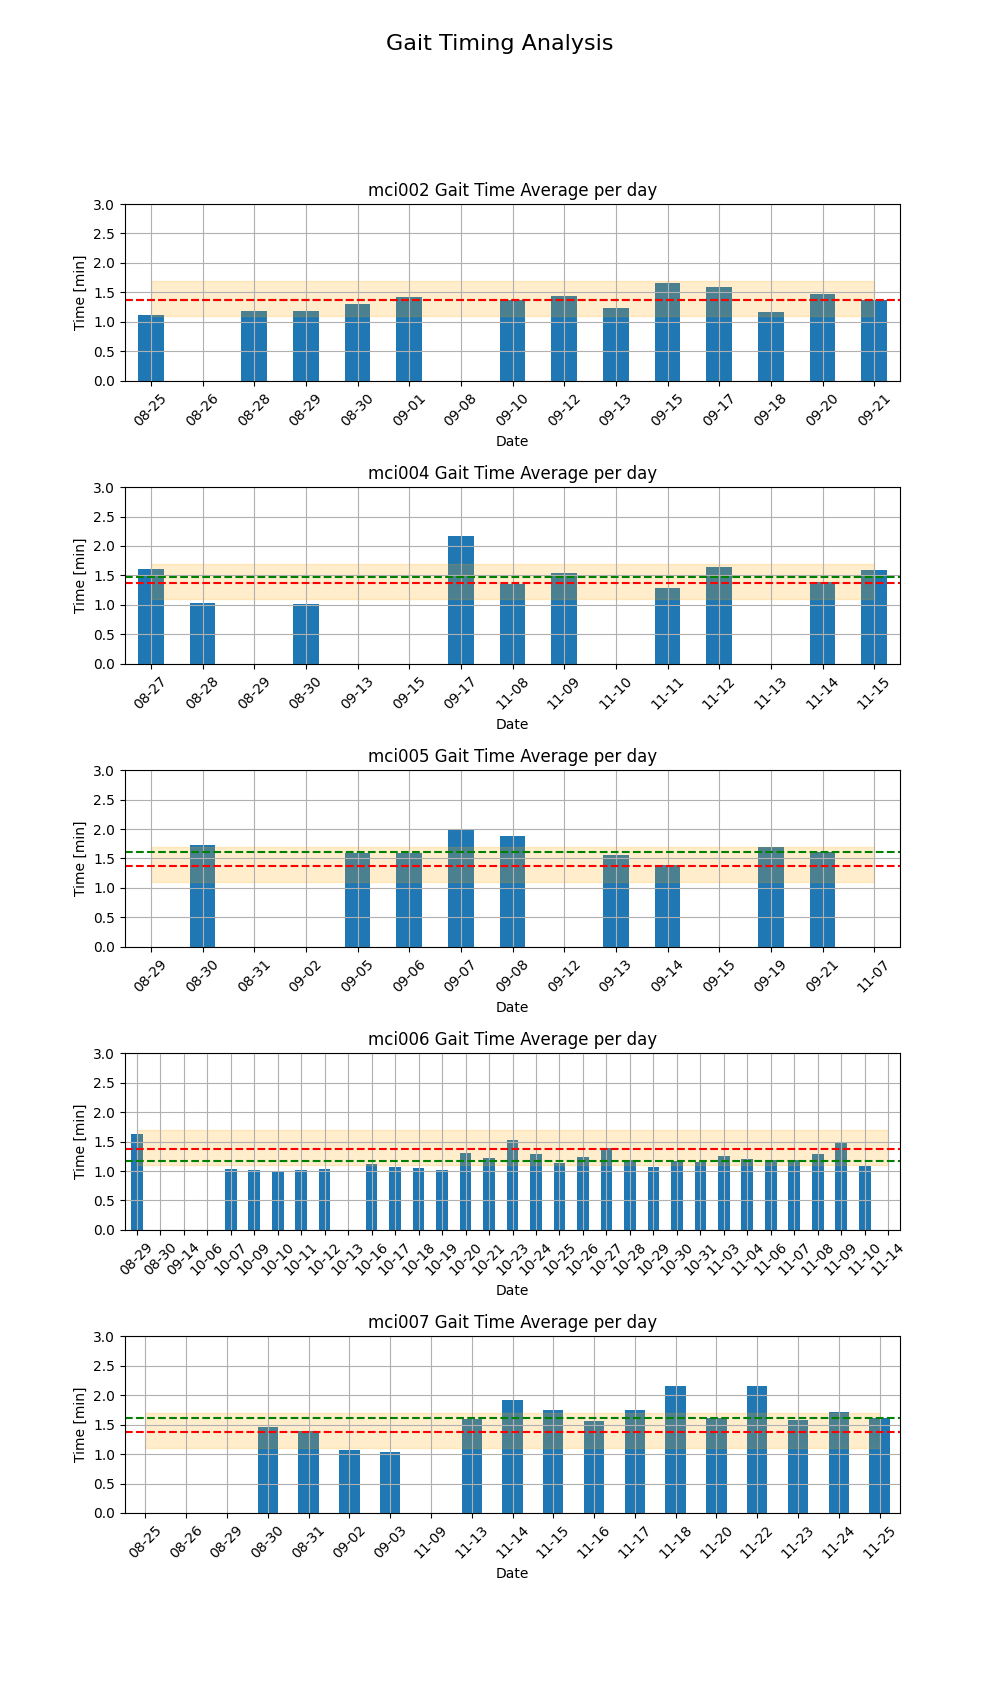

In [44]:
mean_variability = sample['timings']['mean']['Avg_Stride_Time']
std_variability = sample['timings']['std']['Avg_Stride_Time']
upper_bound = mean_variability + std_variability
lower_bound = mean_variability - std_variability

fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(10, 17))
print(axes)
fig.suptitle(f'Gait Timing Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.6)

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    # Calculate the average per day for the selected columns
    df_avg_time = df_left[avg_time_columns]
    daily_avg_time = df_avg_time.groupby('Date').mean()
    ax = daily_avg_time[['Avg_Stride_Time']].plot(kind='bar', ax=axes[index]) # [0])
    ax.set_title(f'{subject} Gait Time Average per day')
    ax.set_xlabel('Date')
    ax.set_ylabel('Time [min]')
    ax.get_legend().remove()
    ax.set_ylim(0, 3)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticks(range(len(daily_avg_time.index)))
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_avg_time.index])
    ax.fill_between(daily_avg_time.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(all_subject_timings[index]['Avg_Stride_Time'].median(), color='green', linestyle='--', label="subject median")
    ax.axhline(sample['timings']['median']['Avg_Stride_Time'], color='red', linestyle='--', label="cohort median")
    # handles, _ = ax.get_legend_handles_labels()
    # labels = ["subject median", "cohort median", "stride time"]
    # # Slice list to remove first handle
    # ax.legend(handles = handles[1:], labels = labels, prop={'size':7})
    
    index += 1

plt.show()
plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Timings.png')


### Variability

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


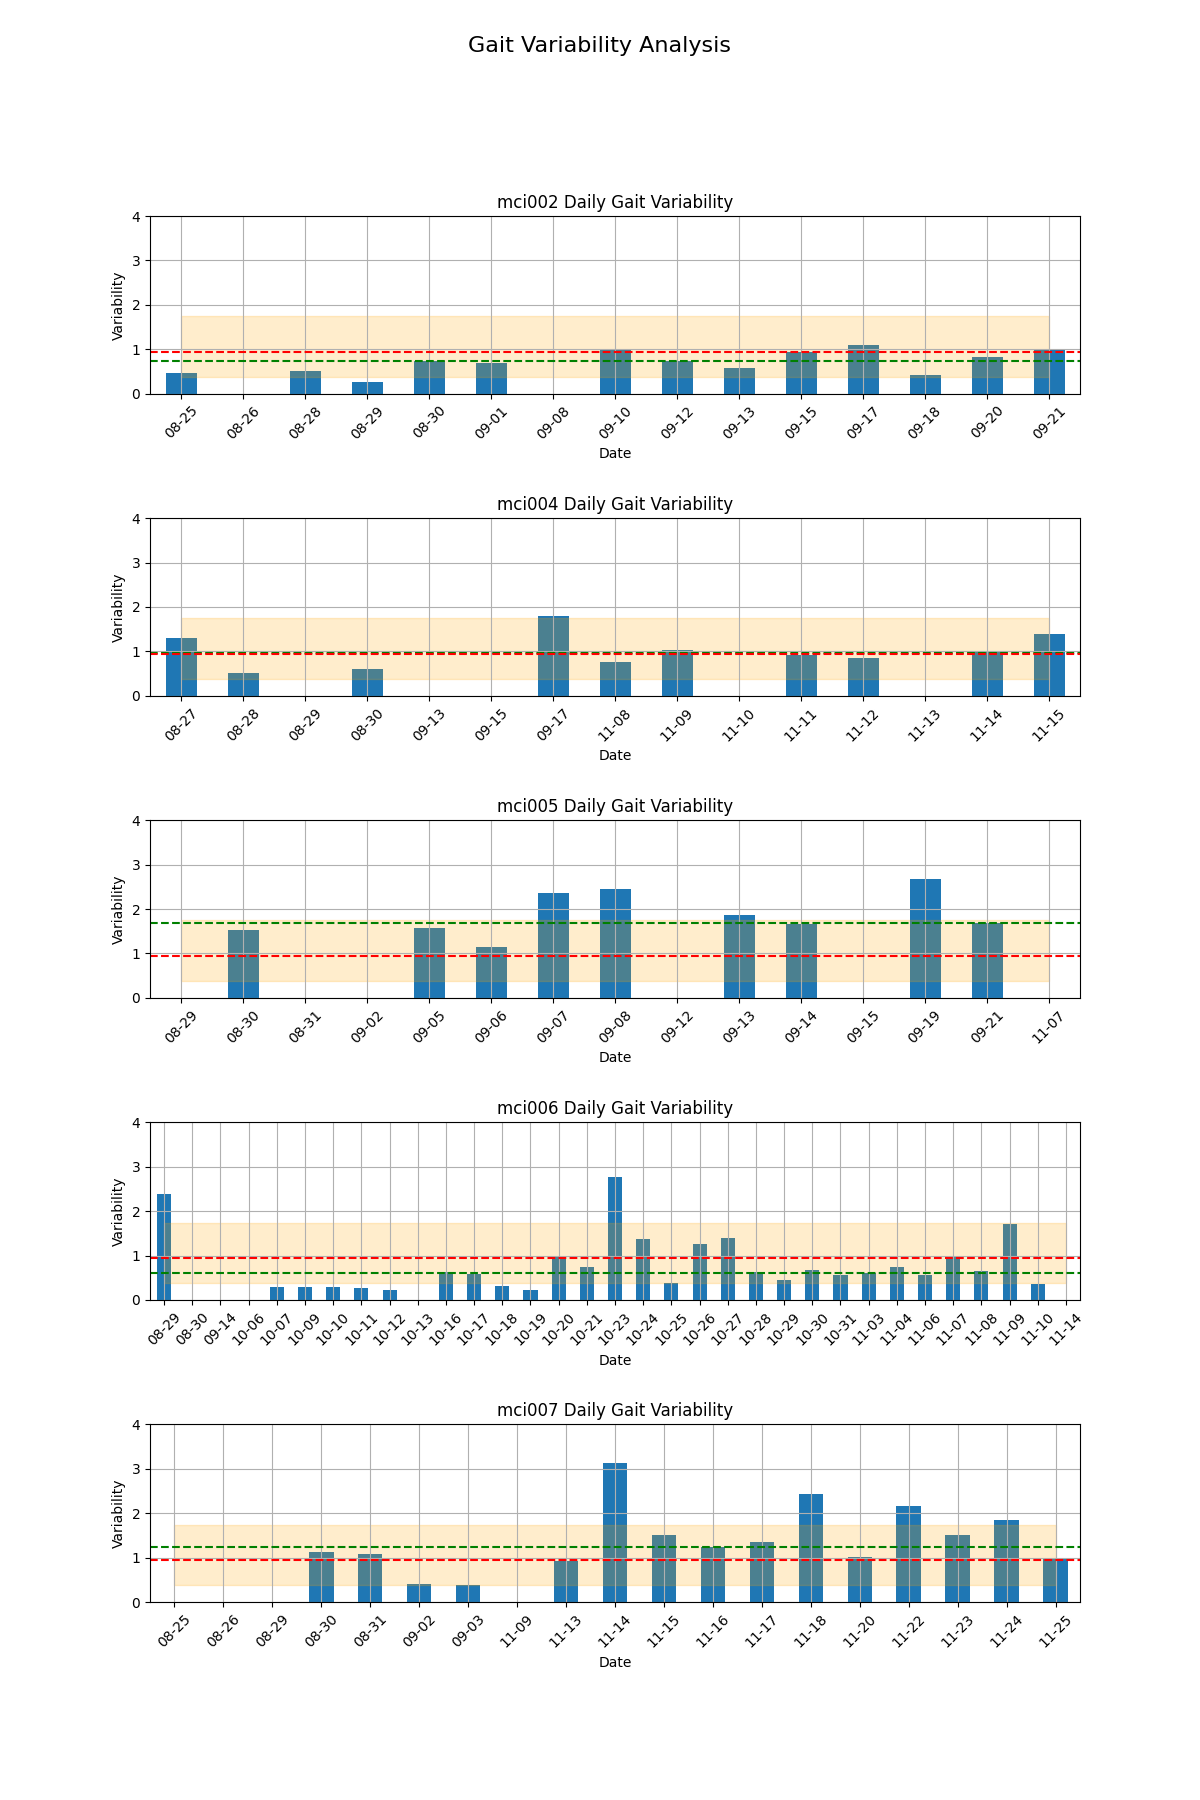

In [35]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 18))
print(axes)
fig.suptitle(f'Gait Variability Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.7)

mean_variability = sample['variability']['mean']['Stride_Time_Variability']
std_variability = sample['variability']['std']['Stride_Time_Variability']
upper_bound = mean_variability + std_variability
lower_bound = mean_variability - std_variability

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')

    df_variability = df_left[['Date', 'Stride_Time_Variability']]

    # Calculate the average per day for the selected columns
    daily_variability = df_variability.groupby('Date').mean()
      
    ax = daily_variability.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Daily Gait Variability')
    ax.set_xlabel('Date')
    ax.set_ylabel('Variability')
    ax.set_ylim(0,4)
    ax.legend(loc='upper left')
    ax.get_legend().remove()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_variability.index])
    ax.fill_between(daily_variability.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(all_subject_variability[index]['Stride_Time_Variability'].median(), color='green', linestyle='--')
    ax.axhline(sample['variability']['median']['Stride_Time_Variability'], color='red', linestyle='--')
    
    
    
    
    index += 1
    
plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Variability.png')


### Speed

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


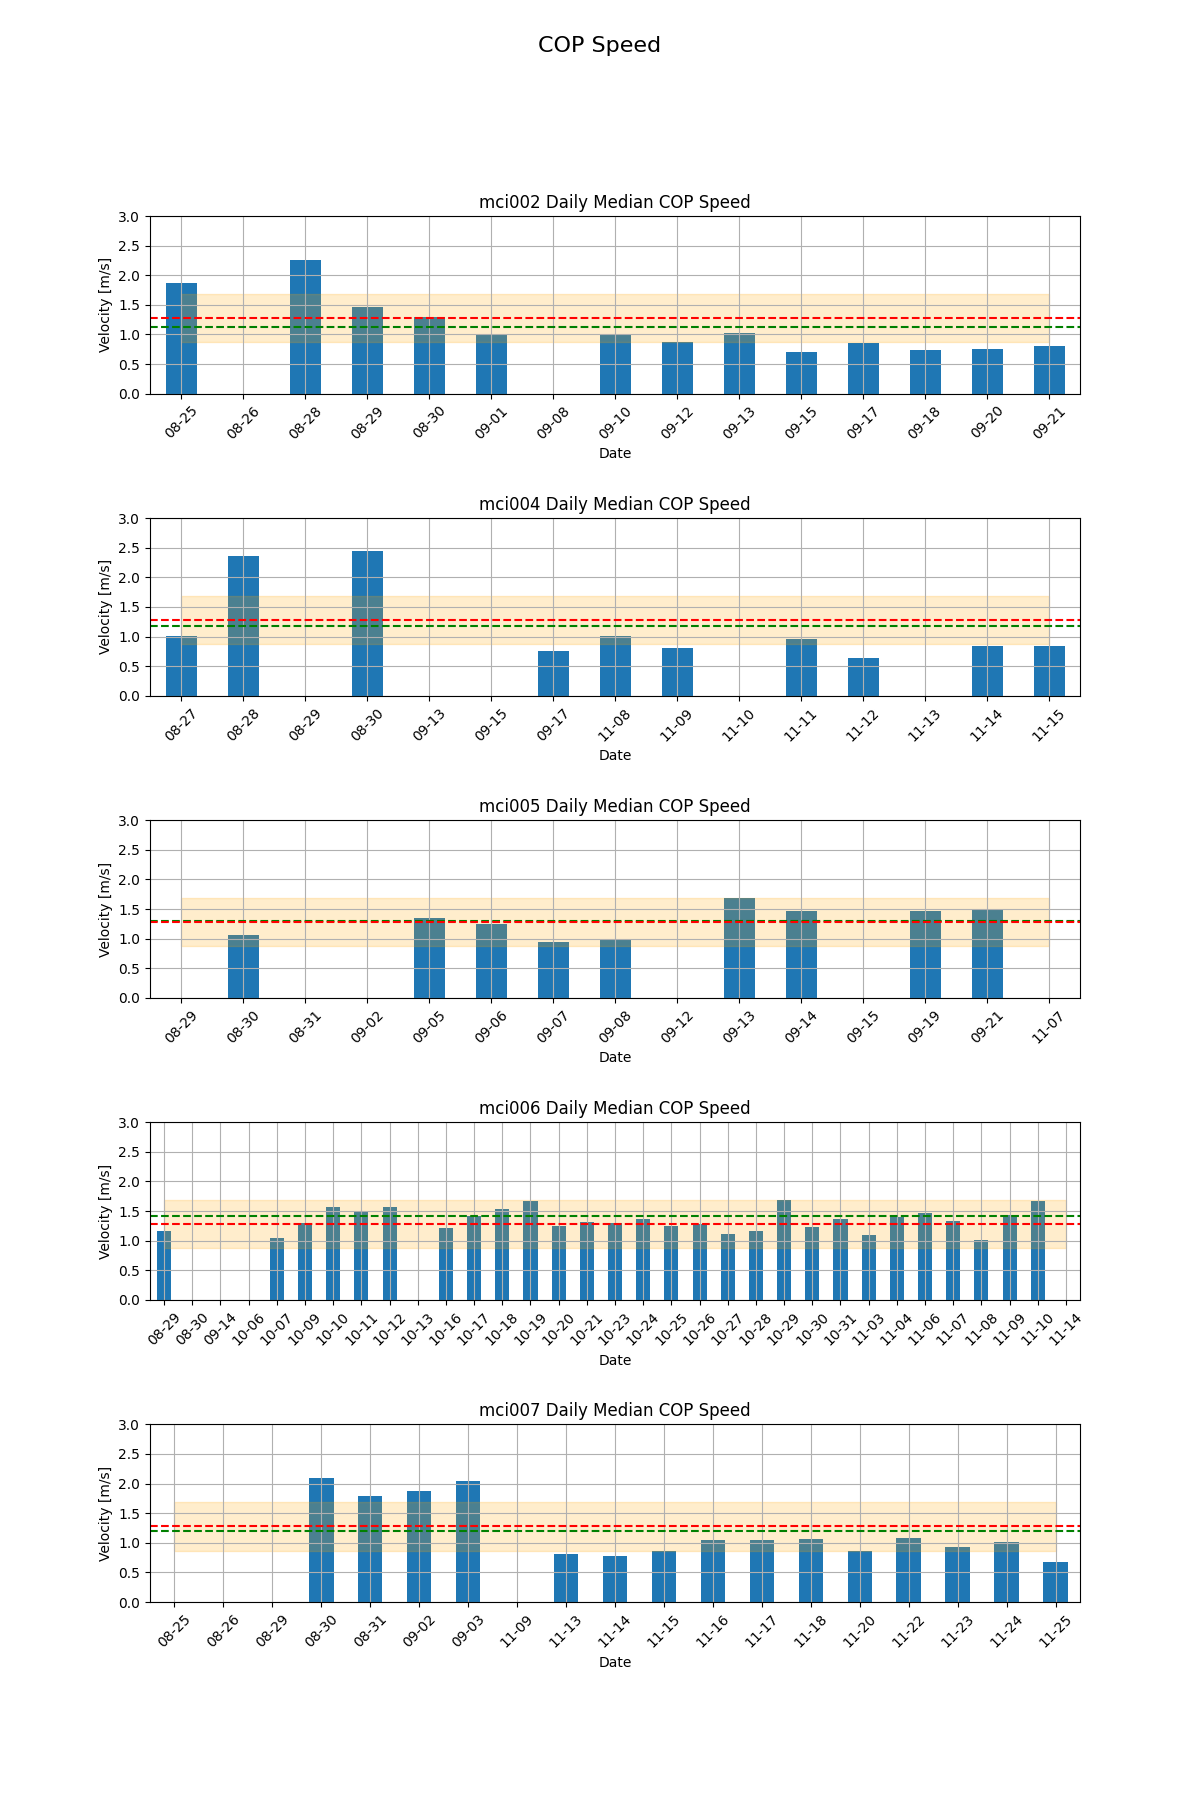

In [39]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 18))
print(axes)
fig.suptitle(f'COP Speed', fontsize=16)
plt.subplots_adjust(hspace=0.7)

mean_speed = sample['speed']['mean']['Median_COP_Speed']
std_speed = sample['speed']['std']['Median_COP_Speed']
upper_bound = mean_speed + std_speed
lower_bound = mean_speed - std_speed

index = 0
for file in files:
   
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')

    subject_avg = all_subject_speed[index]['Median_COP_Speed'].mean()

    df_speed = df_left[speed_columns]

    # Calculate the average per day for the selected columns
    daily_speed = df_speed[['Date', 'Median_COP_Speed']].groupby('Date').median() 

      
    ax = daily_speed.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Daily Median COP Speed')
    ax.set_xlabel('Date')
    ax.set_ylabel('Velocity [m/s]')
    ax.set_ylim(0,3)
    ax.legend(loc='upper left')
    ax.get_legend().remove()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])
    ax.fill_between(daily_speed.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(subject_avg, color='green', linestyle='--')
    ax.axhline(sample['speed']['median']['Median_COP_Speed'], color='red', linestyle='--')
    
    index += 1
    
plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Median Speed.png')


[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


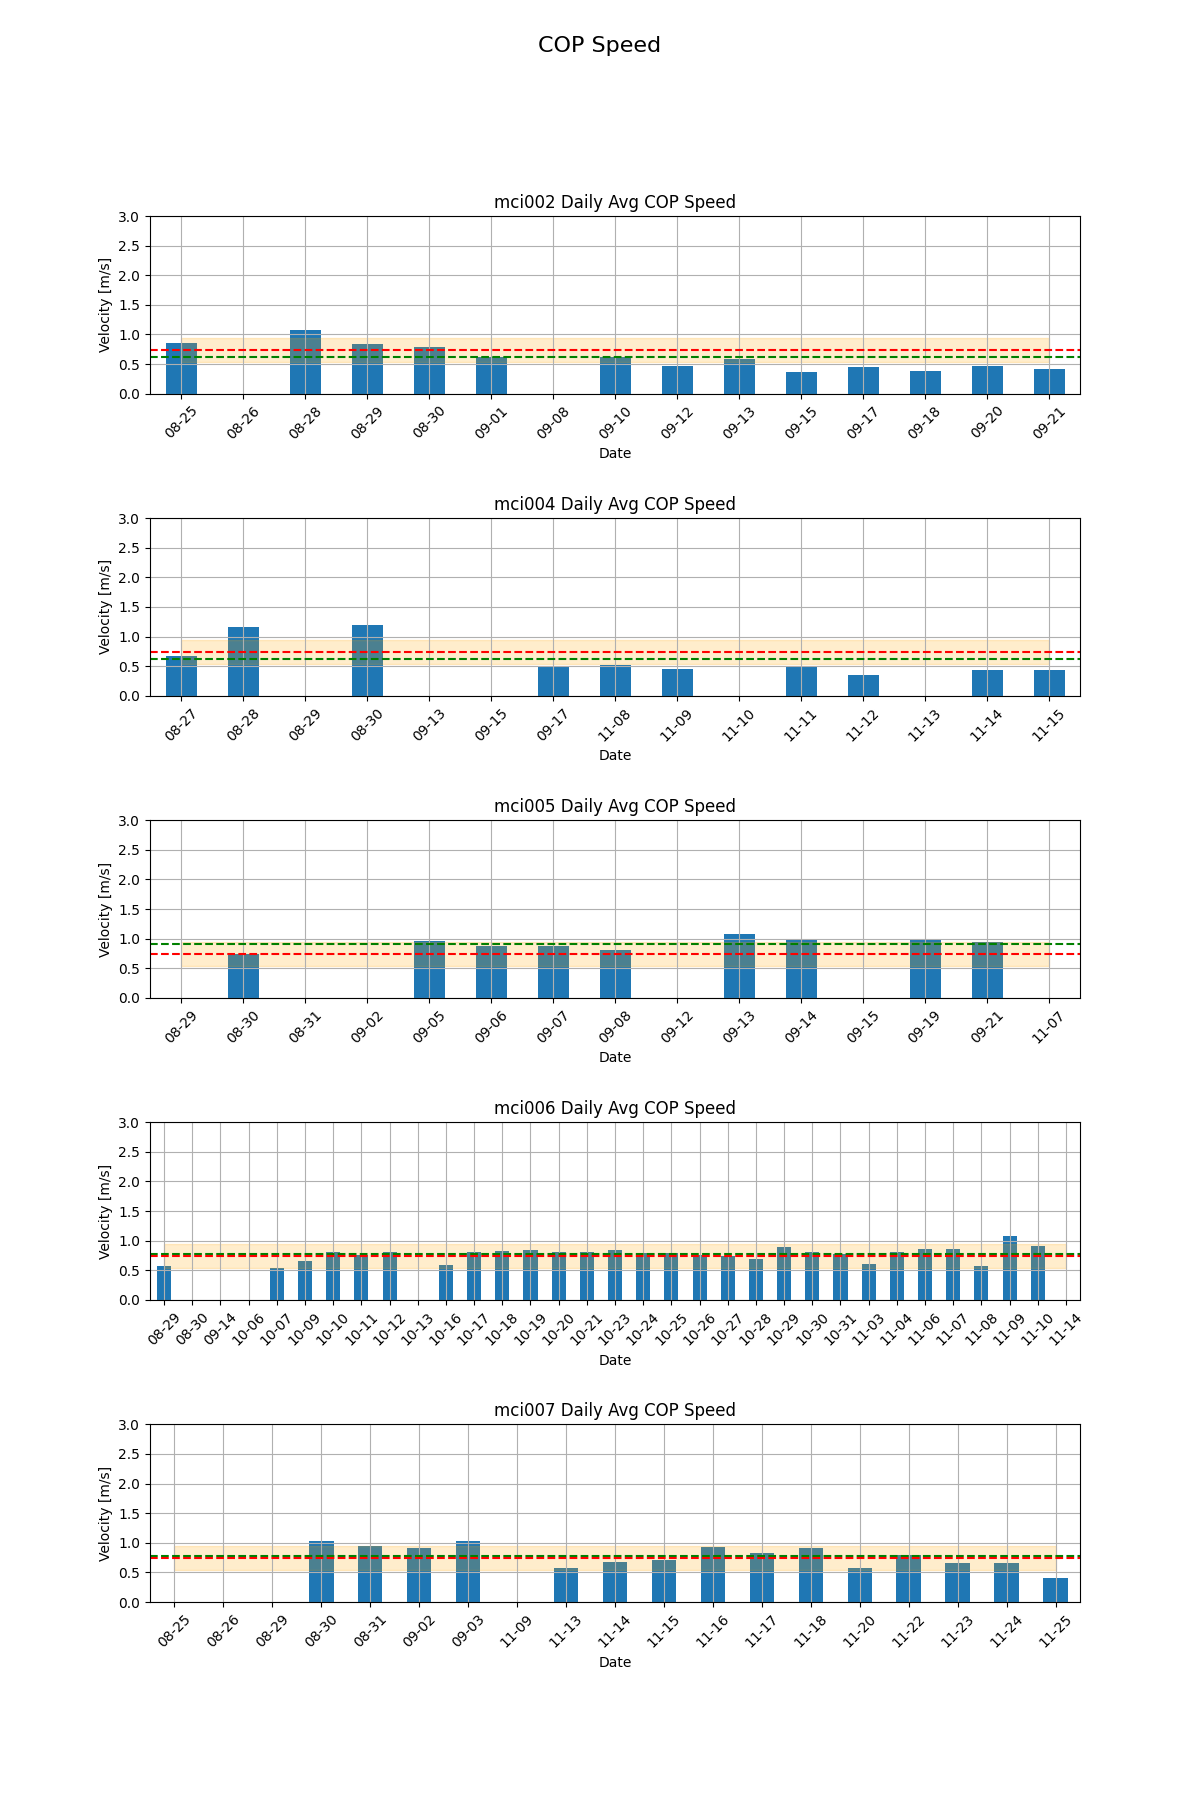

In [40]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 18))
print(axes)
fig.suptitle(f'COP Speed', fontsize=16)
plt.subplots_adjust(hspace=0.7)

mean_speed = sample['speed']['mean']['Avg_COP_Speed']
std_speed = sample['speed']['std']['Avg_COP_Speed']
upper_bound = mean_speed + std_speed
lower_bound = mean_speed - std_speed

index = 0
for file in files:
   
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')

    subject_avg = all_subject_speed[index]['Avg_COP_Speed'].mean()

    df_speed = df_left[speed_columns]

    # Calculate the average per day for the selected columns
    daily_speed = df_speed[['Date', 'Avg_COP_Speed']].groupby('Date').mean() 
      
    ax = daily_speed.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Daily Avg COP Speed')
    ax.set_xlabel('Date')
    ax.set_ylabel('Velocity [m/s]')
    ax.set_ylim(0,3)
    ax.legend(loc='upper left')
    ax.get_legend().remove()
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])
    ax.fill_between(daily_speed.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(subject_avg, color='green', linestyle='--')
    ax.axhline(sample['speed']['mean']['Avg_COP_Speed'], color='red', linestyle='--')
    
    index += 1
    
plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Speed.png')


### Cadence

In [37]:
sample['cadence']['mean']

Avg_Cadence    89.324734
dtype: float64

[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
 <AxesSubplot: >]


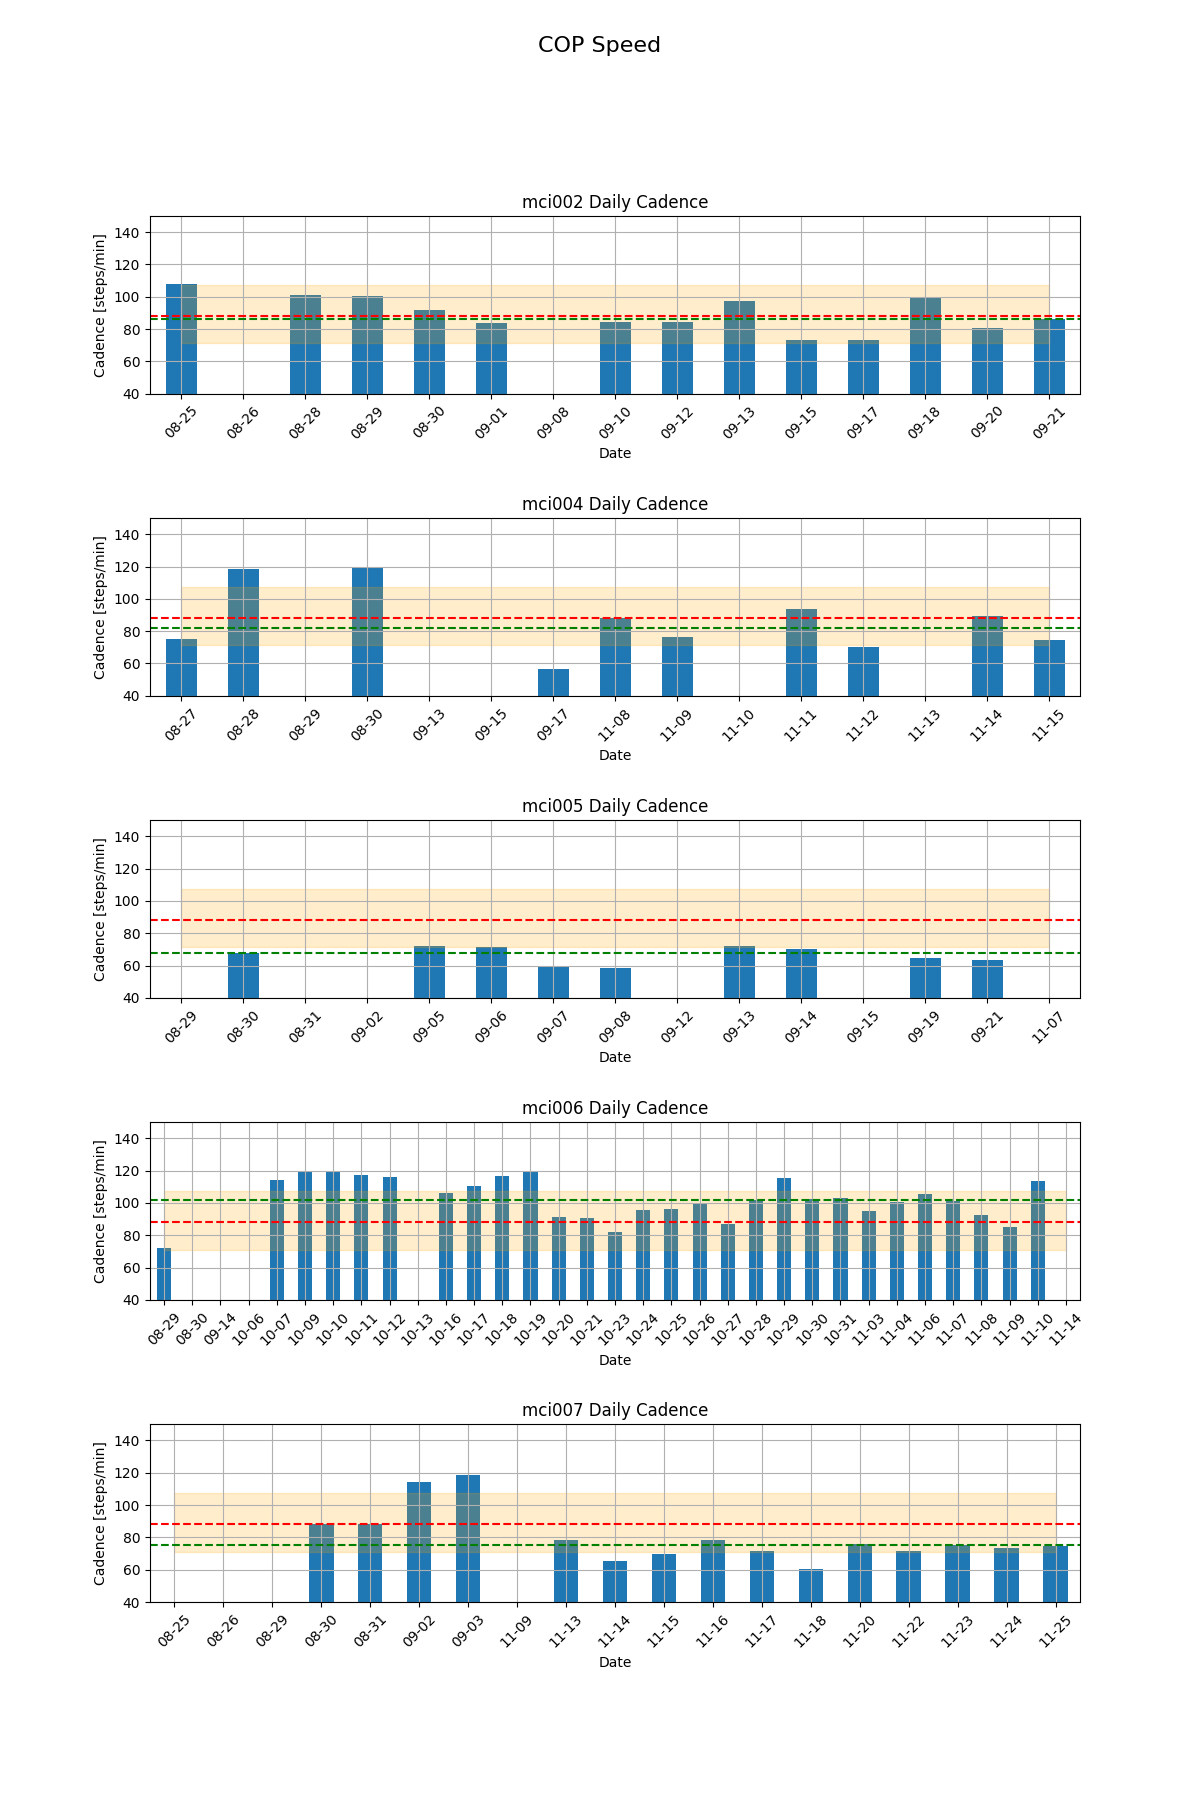

In [43]:
fig, axes = plt.subplots(nrows=num_rows, ncols=1, figsize=(12, 18))
print(axes)
fig.suptitle(f'COP Speed', fontsize=16)
plt.subplots_adjust(hspace=0.7)

mean_cadence = sample['cadence']['mean']['Avg_Cadence']
median_cadence = sample['cadence']['median']['Avg_Cadence']
std_cadence = sample['cadence']['std']['Avg_Cadence']
upper_bound = mean_cadence + std_cadence
lower_bound = mean_cadence - std_cadence

index = 0
for file in files:
   
    subject = file.split('_')[0]
    df = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')

    subject_avg = all_subject_cadence[index]['Avg_Cadence'].median()

    df_cadence = df[cadence_columns]

    # Calculate the average per day for the selected columns
    daily_cadence = df_cadence.groupby('Date').mean() 
      
    ax = daily_cadence.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Daily Cadence')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cadence [steps/min]')
    ax.set_ylim(40,150)
    ax.legend(loc='upper left')
    ax.get_legend().remove()

    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_cadence.index])
    ax.fill_between(daily_cadence.index, lower_bound, upper_bound, alpha=0.2, color='orange', label='Mean ± Std Dev')
    ax.axhline(subject_avg, color='green', linestyle='--')
    ax.axhline(median_cadence, color='red', linestyle='--')
    
    index += 1
    
plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Cadence.png')


### Speed Graph

[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]


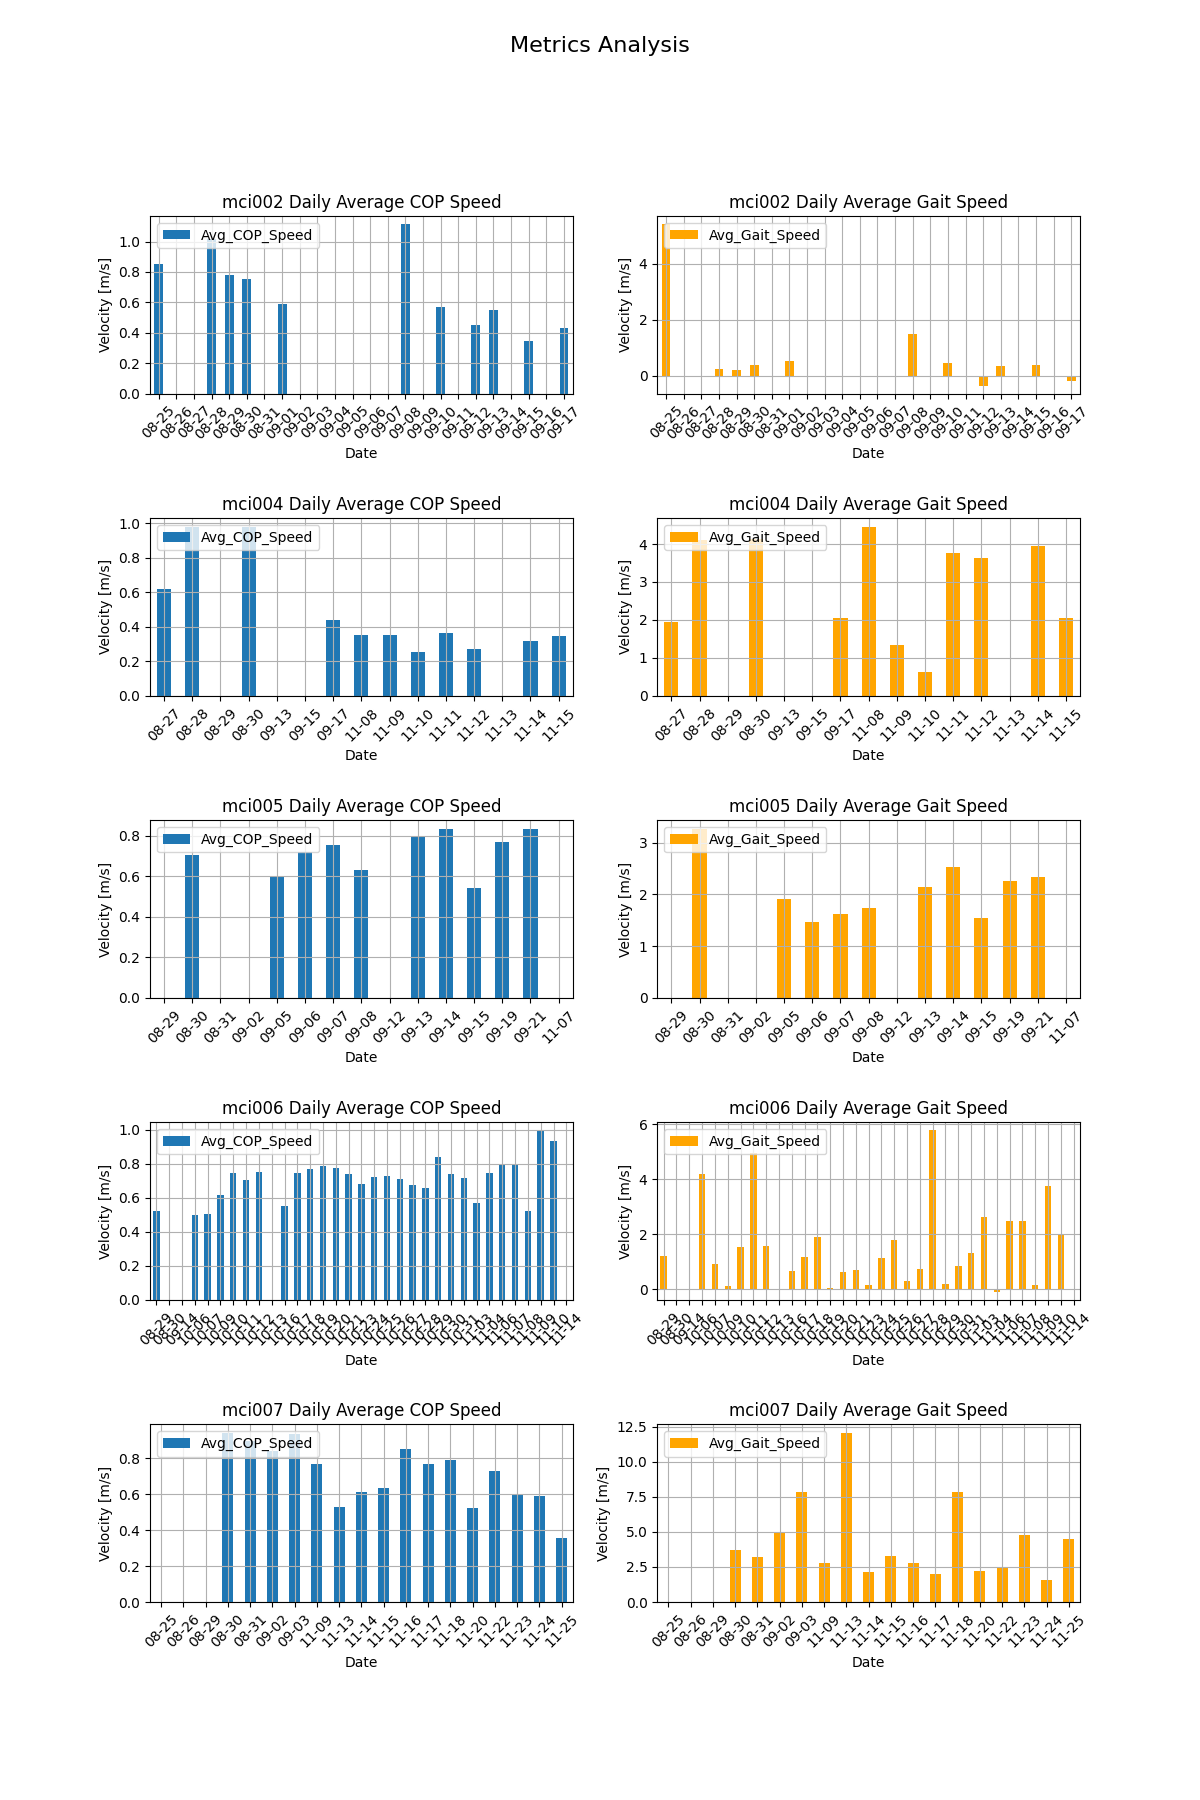

In [12]:
# ---------------------------------------------------------------------------- #
#                                  DEPRECATED                                  #
# ---------------------------------------------------------------------------- #
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 18))
print(axes)
fig.suptitle(f'Metrics Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.7)

index = 0
for file in files:
    # if 'right' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    df_speed = df_left[speed_columns]
    df_gait = df_left[['Date', 'Avg_Gait_Speed']]
    
    # Calculate the average per day for the selected columns
    daily_speed = df_speed.groupby('Date').mean() / 100
    daily_gait = df_gait.groupby('Date').mean() 
    
    ax = daily_speed.plot(kind='bar', ax=axes[index][0])
    ax.set_title(f'{subject} Daily Average COP Speed')
    ax.set_xlabel('Date')
    ax.set_ylabel('Velocity [m/s]')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])
    
    # Plot the selected averages for Avg Time
    ax1 = daily_gait.plot(kind='bar', ax=axes[index][1], color='orange')
    ax1.set_title(f'{subject} Daily Average Gait Speed')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Velocity [m/s]')
    ax1.legend(loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True)
    ax1.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_gait.index])
    
    index += 1
    

plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Speed.png')


### Patient Stats

In [5]:
root_folder = "./COP analysis"
subject = 'mci006'
df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{subject}_left_df.csv')
df_right= pd.read_csv(f'{root_folder}/data/compiled_data/{subject}_left_df.csv')

In [6]:
df_left['Date'] = pd.to_datetime(df_left['Date'], format='%Y-%m-%d')
df_right['Date'] = pd.to_datetime(df_right['Date'], format='%Y-%m-%d')

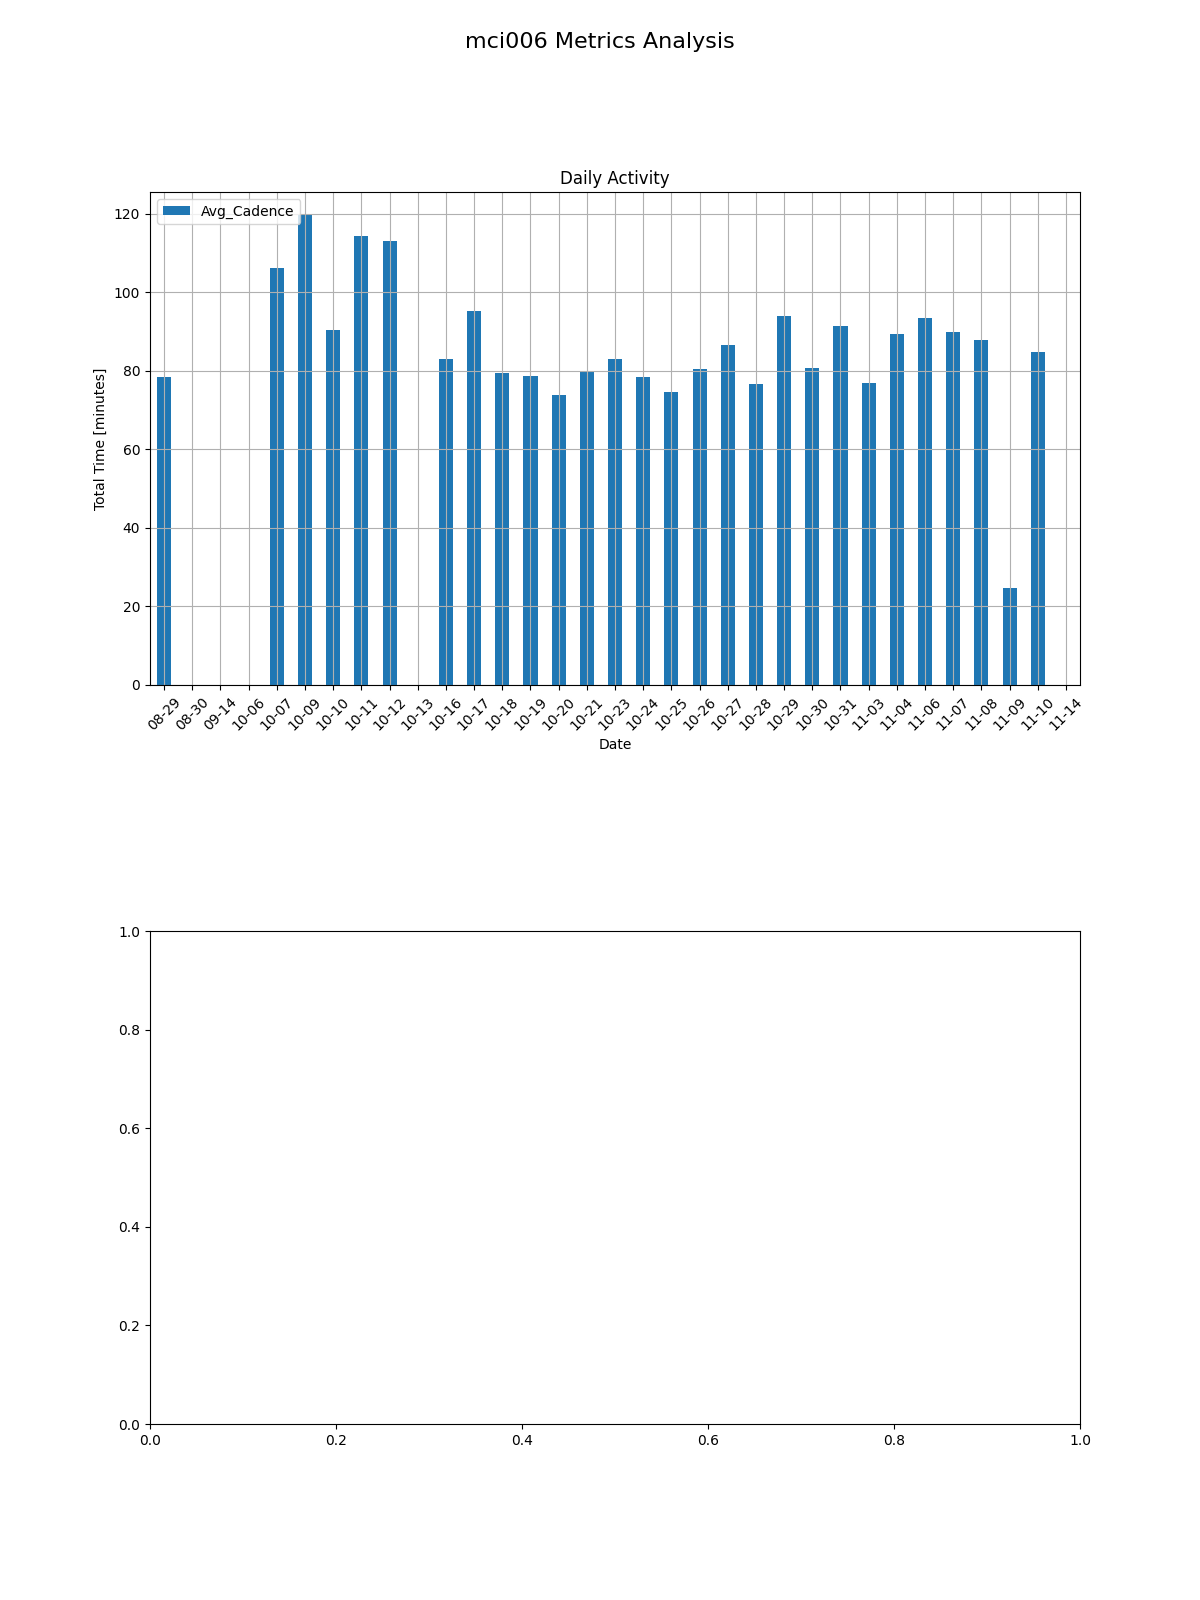

In [14]:
# Select only the columns of interest for Avg Time and Variability
avg_time_columns = ['Date', 'Avg_Step_Time', 'Avg_Swing_Time', 'Avg_Stride_Time']
variability_columns = ['Date', 'Step_Time_Variability', 'Stride_Time_Variability']
speed_columns = ['Date', 'Avg_COP_Speed', 'Avg_Gait_Speed']
activity_columns = ['Date', 'Total_Activity_Time_minutes']
cadence_columns = ['Date', 'Avg_Cadence']


df_avg_time = df_right[avg_time_columns]
df_variability = df_right[variability_columns]
df_activity = df_right[activity_columns]
df_cadence = df_right[cadence_columns]
# df_speed = df_left[speed_columns]
# df_speed.Avg_COP_Speed = df_speed.Avg_COP_Speed / 100

# Calculate the average per day for the selected columns
daily_avg_time = df_avg_time.groupby('Date').mean()
daily_variability = df_variability.groupby('Date').mean()
daily_speed = df_speed.groupby('Date').mean()
daily_activity = df_activity.groupby('Date').sum()
daily_cadence = df_cadence.groupby('Date').mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
fig.suptitle(f'{subject} Metrics Analysis', fontsize=16)
plt.subplots_adjust(hspace=0.5)

ax1 = daily_cadence.plot(kind='bar', ax=axes[0])
ax1.set_title('Daily Activity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Time [minutes]')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Remove the time portion (00:00:00) from x-axis ticks for Avg Time
ax1.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_activity.index])

# # Plot the selected averages for Avg Time
# ax2 = daily_avg_time.plot(kind='bar', ax=axes[1])
# ax2.set_title('Daily Averages of Avg Step, Swing, and Stride Times')
# ax2.set_xlabel('Date')
# ax2.set_ylabel('Average Time [s]')
# ax2.legend(loc='upper left')

# ax2.tick_params(axis='x', rotation=45)
# ax2.grid(True)

# # Remove the time portion (00:00:00) from x-axis ticks for Avg Time
# ax2.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_avg_time.index])

# # Plot the selected averages for Variability
# ax3 = daily_variability.plot(kind='bar', ax=axes[2])
# ax3.set_title('Daily Averages of Step Time and Stride Time Variability')
# ax3.set_xlabel('Date')
# ax3.set_ylabel('Average Value')
# ax3.legend(loc='upper left')

# # Remove the time portion (00:00:00) from x-axis ticks for Variability
# ax3.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_variability.index])
# ax3.tick_params(axis='x', rotation=45)
# ax3.grid(True)

# # Plot the selected averages for Avg Time
# ax4 = daily_cadence.plot(kind='bar', ax=axes[3])
# ax4.set_title('Daily Average Speed for COP and Gait')
# ax4.set_xlabel('Date')
# ax4.set_ylabel('Average speed [m/s]')
# ax4.legend(loc='upper left')
# ax4.tick_params(axis='x', rotation=45)
# ax4.grid(True)

# # Remove the time portion (00:00:00) from x-axis ticks for Avg Time
# ax4.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_speed.index])

plt.show()

plots_path = f'{root_folder}/plots/{subject}'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Metrics_cadence.png')


In [ ]:
index = 0

fig, axes = plt.subplots(nrows=len(subjects), ncols=1, figsize=(12, 16))
print(axes)
fig.suptitle(f'Cadence per subject', fontsize=16)
plt.subplots_adjust(hspace=0.6)

for file in files:
    # if 'left' in file:
    #     print('skip right')
    #     continue 
    
    subject = file.split('_')[0]
    df_left = pd.read_csv(f'{root_folder}/data/compiled_data/{file}')
        
    # Calculate the average per day for the selected columns
    df_activity = df_left[activity_columns]
    daily_activity = df_activity.groupby('Date').sum()

    ax = daily_activity.plot(kind='bar', ax=axes[index])
    ax.set_title(f'{subject} Activity per Day')
    ax.set_xlabel('Date')
    ax.set_ylabel('Total Time [min]')
    ax.legend(loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.set_xticklabels([pd.Timestamp(date).strftime('%m-%d') for date in daily_activity.index])
    
    index += 1
    

plt.show()

plots_path = f'{root_folder}/plots'
if not os.path.isdir(plots_path):
    os.makedirs(plots_path)
    
plt.savefig(f'{plots_path}/Avg Activity.png')